# IMPORTACIONES

In [ ]:
import pandas as pd
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from io import StringIO
from subprocess import call
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# PREPROCESO

Importación de los datos del dataset y Mostrar las primeras y últimas filas del dataframe y Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df = pd.read_csv('/content/heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

Mostrar parámetros estadísticos de los datos

---




In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Mostrar un mapa de calor que indique la correlación entre variables


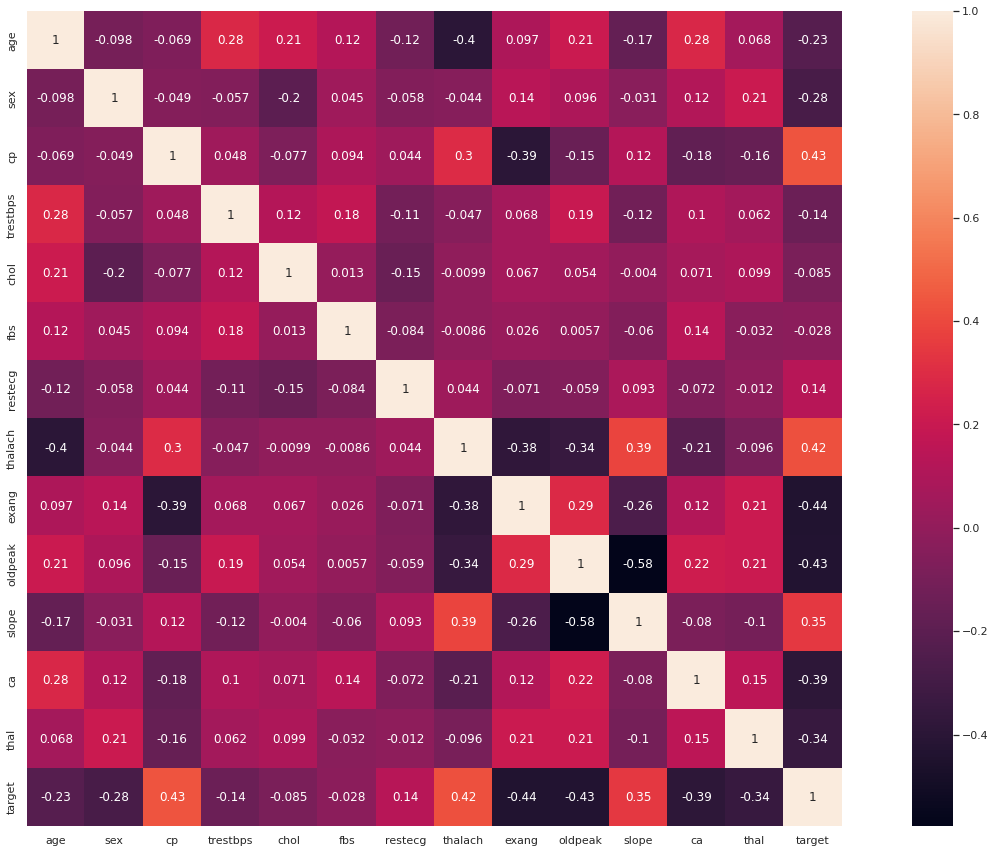

In [ ]:
sbn.set(rc = {'figure.figsize':(25,15)})
sbn.heatmap(df.corr(), square=True, annot=True)

Separar datos entre datos de entrada y etiquetas (resultados)


In [ ]:
x_heart = df.drop('target', axis = 1)
y_heart = df['target']
y_heart

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_heart,y_heart, random_state=1, test_size=0.20)

# ENTRENAMIENTO Y PREDICCION

Probar distintas estimaciones para obtener el mejor resultado



In [ ]:
l_estimators = [2,4,8,16,32,64,128,256]
total_score = []
for estimator in l_estimators:
  model = RandomForestClassifier(n_estimators = estimator, criterion='gini', random_state=0)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  total_score.append(accuracy_score(y_test,y_pred))


In [ ]:
total_score

[0.7213114754098361,
 0.7868852459016393,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7704918032786885]

No handles with labels found to put in legend.


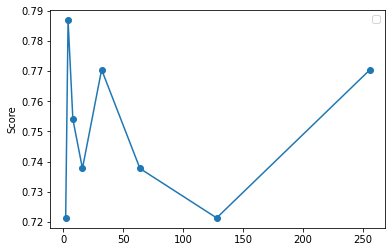

In [ ]:
plt.plot(l_estimators,total_score,marker='o')
plt.ylabel('Score')

plt.legend()
plt.show()

In [ ]:
best_est = l_estimators[np.argmax(total_score)]
best_score = max(total_score)
print("Max value (estimator : %i, Score: %6.2f" % (best_est, best_score))

Max value (estimator : 4, Score:   0.79


Elegir, instanciar (eligiendo unos valores concretos) y entrenar el modelo Y Realizar una predicción con los datos de prueba

In [ ]:
model = RandomForestClassifier(n_estimators = 4, criterion='gini', random_state=0)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_test,y_predict)
score

0.7868852459016393

Importancia de las variables

In [ ]:
model.feature_importances_

array([0.09867293, 0.05015743, 0.09251926, 0.10364876, 0.05608277,
       0.        , 0.02117008, 0.12434598, 0.07710511, 0.1536852 ,
       0.06260586, 0.0780763 , 0.08193033])

Representacion de uno de los arboles


In [ ]:
model_classes = ['0','1']
estimator = model.estimators_[3]

In [ ]:
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = x_heart.columns,
                class_names = model_classes,
                rounded = True, proportion = False,filled = True)

In [ ]:
call(['dot', '-Tpng', 'tree.dot', '-o', '/content/tree.png', '-Gdpi=600'])

0

In [ ]:
from IPython.display import Image
Image(filename = '/content/tree.png')

# EVALUACION

Mostrar el porcentaje de elementos correctamente clasificados


In [ ]:
accuracy_score(y_test,y_predict)

0.7868852459016393

Matriz de confusion

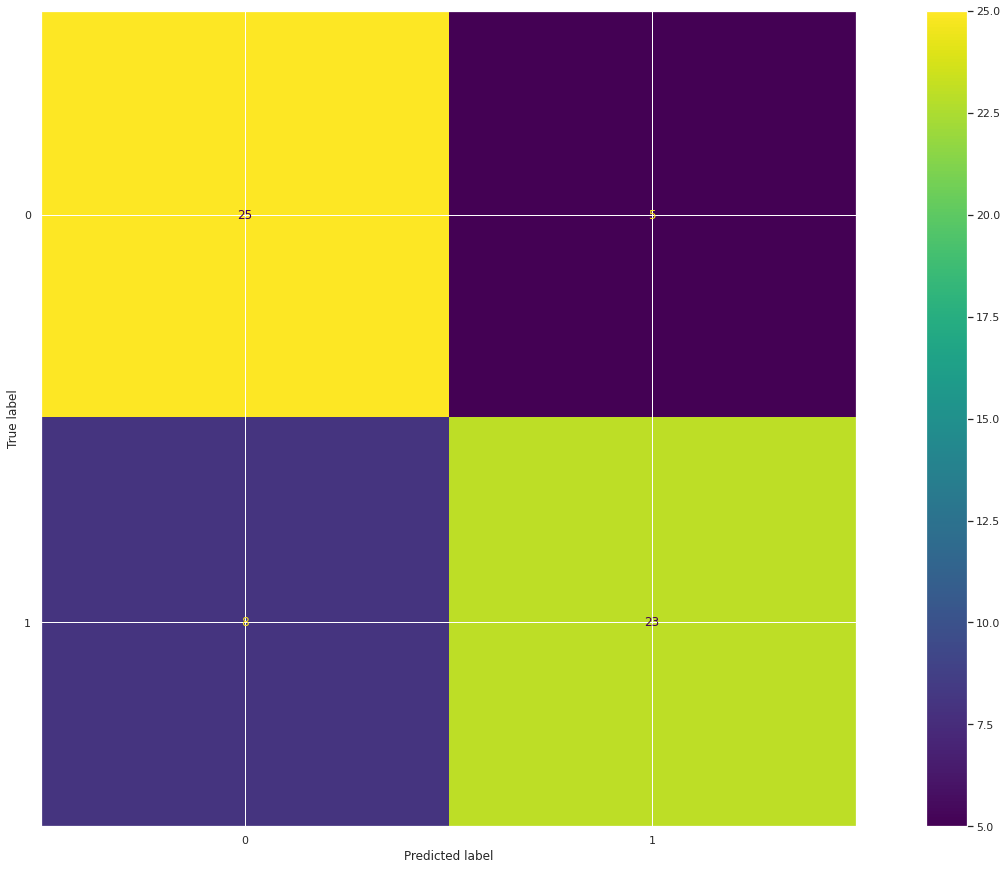

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

# OPTIMIZACION

Primera busqueda con GridSearch la cual es mas amplia, tras una valoracion, la repito en la siguiente celda de codigo pero con menos parametros

In [ ]:
param_dist = {
    "n_estimators" : [2,4,6,10,12,14,16,18,20,22],
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "max_features": ['auto', 'sqrt'],
    "bootstrap": [True,False] 
}

clasifier = RandomForestClassifier()
grid = GridSearchCV(estimator= clasifier, param_grid=param_dist, cv = 5)
grid.fit(x_train,y_train)
grid.best_estimator_


RandomForestClassifier(bootstrap=False, max_depth=6, n_estimators=14)

In [ ]:
best_grid = grid.best_estimator_
best_grid.fit(x_train, y_train)
y_pred_grid = best_grid.predict(x_test)
score_grid = accuracy_score(y_test,y_pred_grid)
score_grid

0.7377049180327869

In [ ]:
param_dist = {
    "n_estimators" : [2,4,6,10,12],
    "max_depth": [None,4,5,6,7,8,9,10],
    "max_features": ['auto', 'sqrt'],
    "bootstrap": [True,False] 
}

clasifier = RandomForestClassifier()
grid = GridSearchCV(estimator= clasifier, param_grid=param_dist, cv = 5)
grid.fit(x_train,y_train)
grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=7, max_features='sqrt',
                       n_estimators=12)

In [ ]:
best_grid = grid.best_estimator_
best_grid.fit(x_train, y_train)
y_pred_grid = best_grid.predict(x_test)
score_grid = accuracy_score(y_test,y_pred_grid)
score_grid

0.7377049180327869